# Librerías que vamos a utilizar

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Lectura del archivo de datos en un dataframe

In [2]:
# Ruta al fichero (cámbiala según tu necesidad)
file_path = './laguna_datos_horarios_rellenos.csv'

# Cargar el fichero en un DataFrame
df = pd.read_csv(file_path)
#Mostramos cuantas filas y columnas se han cargado en total
print(f"Se han cargado {df.shape[0]} filas y {df.shape[1]} columnas")
# Mostrar las primeras filas para verificar
print(df.head())



Se han cargado 2113 filas y 4 columnas
             fecha  temperatura   ambiente  nivel
0  17/06/2023 0:00       31.500  22.000000   51.0
1  17/06/2023 1:00       31.470  21.780000   51.0
2  17/06/2023 2:00       31.235  21.201000   47.8
3  17/06/2023 3:00       31.295  22.439250   52.0
4  17/06/2023 4:00       31.375  23.058375   50.0


## Creamos un gráfico para mostrar la temperatura

/tmp/ipykernel_500976/3030465157.py:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['fecha'] = pd.to_datetime(df['fecha'])


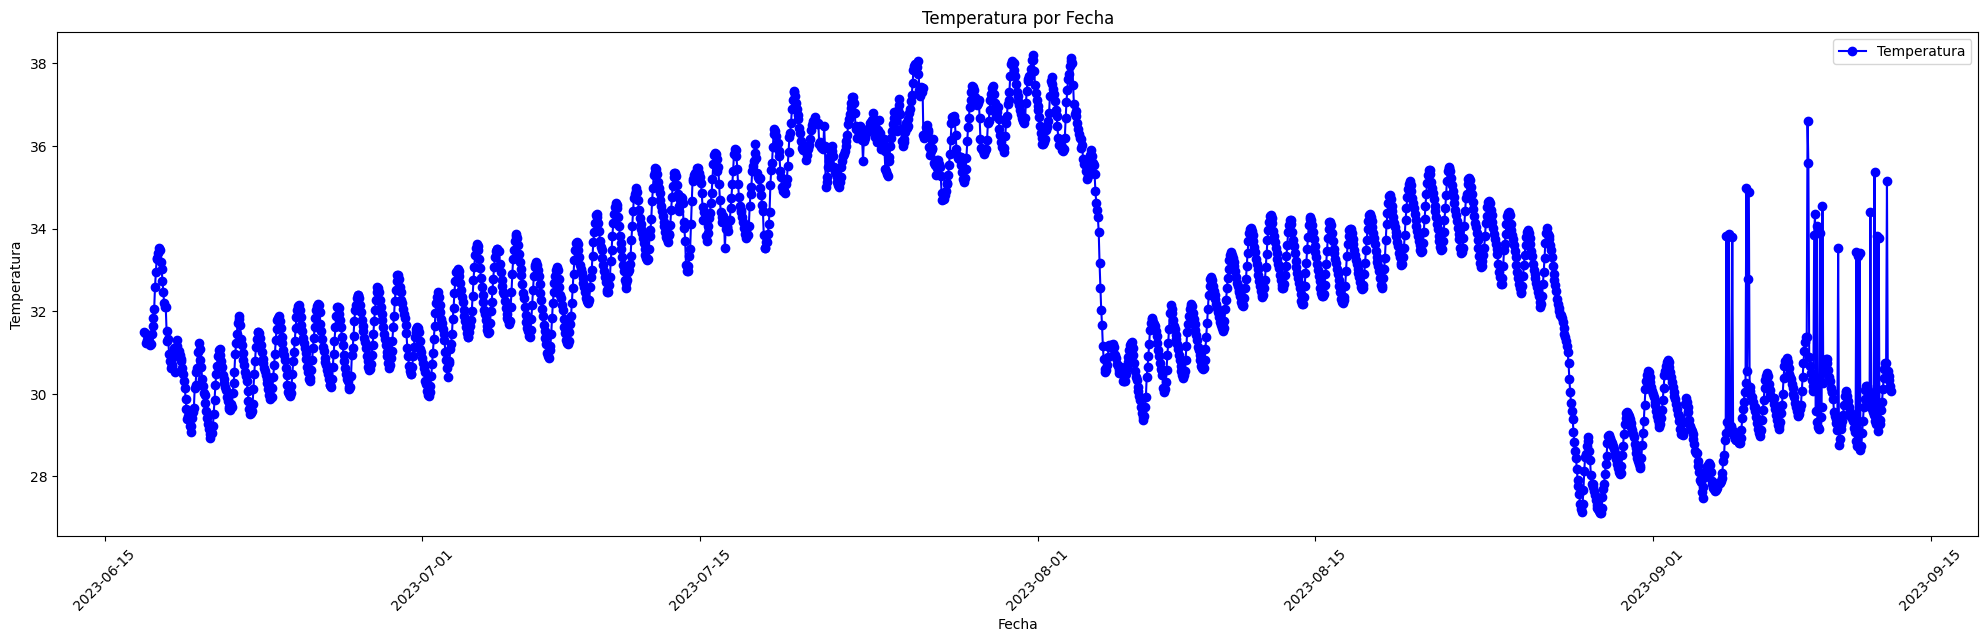

In [3]:
# Asegúrate de que la columna "fecha" esté en formato de fecha
df['fecha'] = pd.to_datetime(df['fecha'])

# Crear el gráfico
plt.figure(figsize=(20, 6))  # Ajusta el tamaño según lo desees
plt.plot(df['fecha'], df['temperatura'], label='Temperatura', color='blue', marker='o')
plt.title('Temperatura por Fecha')
plt.xlabel('Fecha')
plt.ylabel('Temperatura')
plt.grid(False)
plt.legend()
plt.tight_layout()
plt.xticks(rotation=45)  # Rota las etiquetas del eje x para mejor visualización si es necesario
plt.show()

# Separación del dataframe en train y test (80%-20%)

## Esta separación es aleatoria, ¿Valdría para este problema?

In [4]:
# test_size = 20 Especifica que el 20% del dataset original se asignará al conjunto de prueba.
# random_state fija la semilla para la generación de números aleatorios, garantiza que siempre se realiza la misma división.
train_df_random, test_df_random = train_test_split(df, test_size=0.20, random_state=42)

print(f"Número de registros en el conjunto de entrenamiento: {train_df_random.shape[0]}")
print(f"Número de registros en el conjunto de prueba: {test_df_random.shape[0]}")

Número de registros en el conjunto de entrenamiento: 1690
Número de registros en el conjunto de prueba: 423


### Ejercicio: Separación de Series Temporales

**Contexto**: Estás trabajando con un conjunto de datos que representa una serie temporal. Para evaluar correctamente un modelo predictivo en este contexto, es esencial que el conjunto de prueba represente datos futuros no vistos durante el entrenamiento.

**Instrucciones**:

1. Carga el conjunto de datos desde el archivo `ruta/del/fichero.csv` (./laguna_datos_horarios_rellenos.csv).
2. Asegúrate de que el conjunto de datos esté ordenado cronológicamente por la columna "fecha".
3. Divide el conjunto de datos de manera que el 80% inicial se utilice para entrenamiento (`train_df`) y el 20% final para pruebas (`test_df`).
4. Imprime el número de registros en ambos conjuntos para verificar la división.

**Consejos**:
- No es necesario dividir los datos de forma aleatoria.
- Considera usar operaciones de índice con `pandas` para lograr la división.

**Objetivo**: Al final de este ejercicio, deberías tener dos DataFrames, `train_df` y `test_df`, que contengan el 80% inicial y el 20% final de los datos originales, respectivamente.


In [6]:
# Asegurarte de que el dataframe esté ordenado por fecha (en caso de que no lo esté)
df = df.sort_values(by='fecha')

# Calcular el índice de corte
cut_idx = int(len(df) * 0.8)

# Separar en train y test
train_df_seq = df.iloc[:cut_idx]
test_df_seq = df.iloc[cut_idx:]

print(f"Número de registros en el conjunto de entrenamiento: {train_df_seq.shape[0]}")
print(f"Número de registros en el conjunto de prueba: {test_df_seq.shape[0]}")

Número de registros en el conjunto de entrenamiento: 1690
Número de registros en el conjunto de prueba: 423


# Muestra el resultado de la separación aleatoria y secuencial
***¿Qué diferencias ves?***

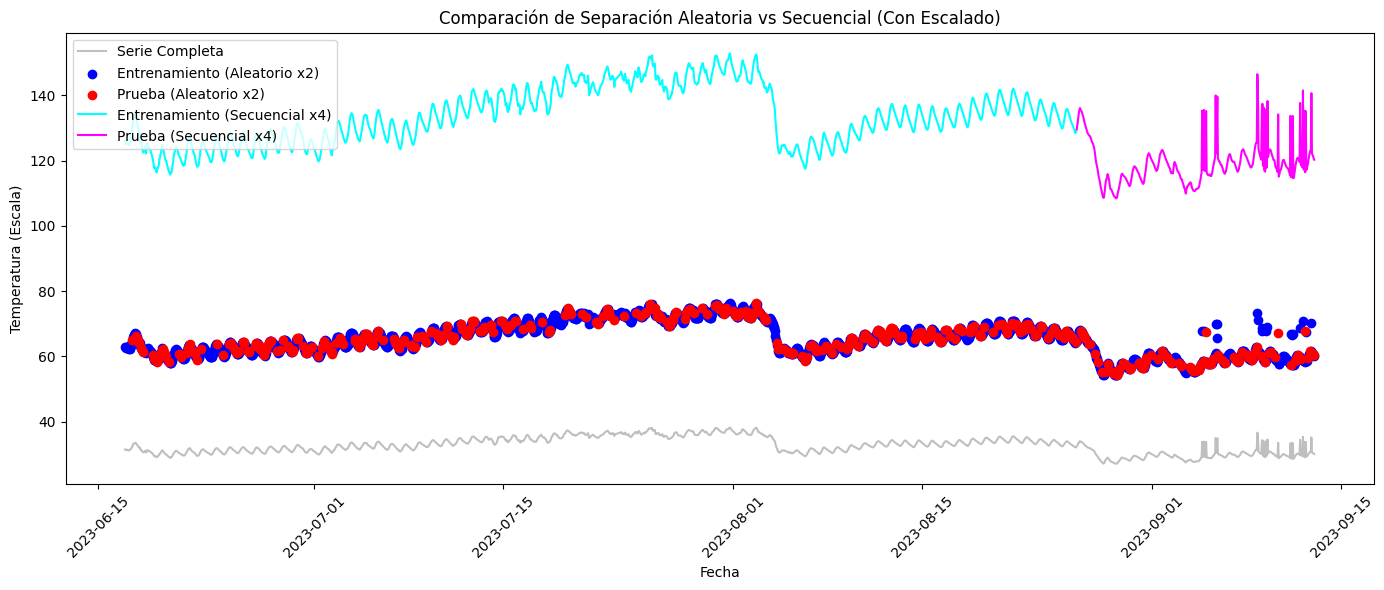

In [8]:
# Escalar valores de temperatura para la separación aleatoria
scale_train_random = train_df_random.copy()
scale_test_random = test_df_random.copy()

scale_train_random['temperatura'] *= 2
scale_test_random ['temperatura'] *= 2

# Escalar valores de temperatura para la separación secuencial
scale_train_seq = train_df_seq.copy()
scale_test_seq = test_df_seq.copy()

# Escalar valores de temperatura para la separación secuencial
scale_train_seq['temperatura'] *= 4
scale_test_seq['temperatura'] *= 4


# Gráfico
fig, ax = plt.subplots(figsize=(14, 6))

# Serie completa (sin escalar)
ax.plot(df['fecha'], df['temperatura'], label='Serie Completa', color='grey', alpha=0.5)

# Puntos de separación aleatoria
ax.scatter(scale_train_random['fecha'], scale_train_random['temperatura'], marker='o', color='blue', label='Entrenamiento (Aleatorio x2)')
ax.scatter(scale_test_random['fecha'], scale_test_random['temperatura'], marker='o', color='red', label='Prueba (Aleatorio x2)')

# Separación secuencial
ax.plot(scale_train_seq['fecha'], scale_train_seq['temperatura'], color='cyan', label='Entrenamiento (Secuencial x4)')
ax.plot(scale_test_seq ['fecha'], scale_test_seq ['temperatura'], color='magenta', label='Prueba (Secuencial x4)')

# Ajustes del gráfico
ax.set_title('Comparación de Separación Aleatoria vs Secuencial (Con Escalado)')
ax.set_xlabel('Fecha')
ax.set_ylabel('Temperatura (Escala)')
ax.legend(loc='upper left')
#ax.set_xticks(ax.get_xticks()[::int(len(df['fecha'])/10)])  # Reducing number of x-ticks for clarity
ax.xaxis.set_tick_params(rotation=45)

plt.tight_layout()
plt.show()